In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

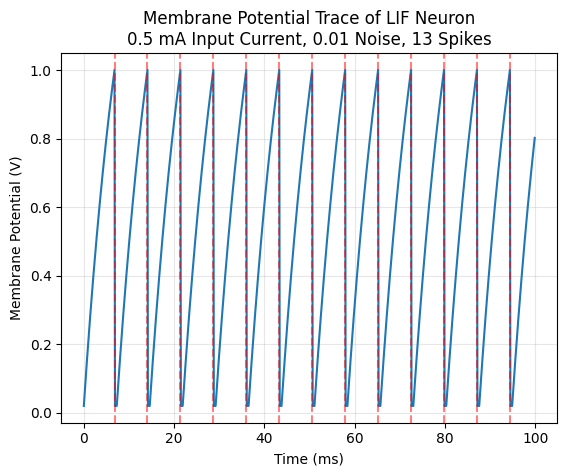

In [64]:
def lif_neuron(
        I: float,
        noise: float = 0.0,
        t_max: int = 100,
        V_rest: float = 0,
        V_reset: float = 0,
        V_thresh: float = 1, 
        R: float = 10,
        tau_m: float = 10, 
        t_ref: float = 0.5,
        dt: float = 0.1,
	):
    """
    Simulate a leaky integrate-and-fire (LIF) neuron for a given input current and noise level.

	# Parameters
     - `I: float`: Input current in mA
     - `noise: float`: Standard deviation of Gaussian noise
		(Default: 0.0)
     - `t_max: int`: Maximum time in ms
		(Default: 100)
     - `V_rest: float`: Resting potential in V
		(Default: 0.0)
     - `V_reset: float`: Reset voltage in V
		(Default: 0.0)
	 - `V_thresh: float`: Threshold voltage in V
		(Default: 1.0)
	 - `R: float`: Resistance in MOhms
		(Default: 10.0)
	 - `tau_m: float`: Membrane time constant in ms
		(Default: 10.0)
	 - `t_ref: float`: Refractory period in ms
		(Default: 5.0)

    # Returns
    tuple[list[int], list[float]]: tuple of:
     - `spikes: list[float]`: Spike times in ms
	 - `V_trace: list[float]`: Membrane potential trace in V
    """
    spikes: list[float] = []
    V_trace: list[float] = []
    V: float = V_rest
    t: int = 0.0
    t_last_spike = -np.inf  # time since the last spike
    T_domain: np.ndarray = np.arange(0, t_max, dt)

    for t in T_domain:
        # Add Gaussian noise to the input current
        I_noise: float = I + np.random.normal(0, noise)

        # Leaky integrate-and-fire model update
        dV: float = (-(V - V_rest) + R * I_noise) / tau_m
        V += dV * dt
        V_trace.append(V)

        # Check for spike
        if V >= V_thresh:
            spikes.append(t)
            V = V_reset
            t_last_spike = t

        # Refractory period
        if t - t_last_spike < t_ref:
            V = V_reset

    return spikes, V_trace, T_domain

# Test the function with an example current and noise level
params: dict[str, float] = dict(
    I=0.5,
    noise=0.01,
)
spikes, V_trace, T_domain = lif_neuron(I=0.2, noise=0.0, t_max=100)
# Plot the membrane potential trace
plt.plot(T_domain, V_trace)
# vertical lines at spike times
for spike in spikes:
    plt.axvline(spike, c='r', ls='--', alpha=0.5)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (V)')
plt.title(f'Membrane Potential Trace of LIF Neuron\n{params["I"]} mA Input Current, {params["noise"]} Noise, {len(spikes)} Spikes')
plt.grid(True, alpha=0.3)
plt.show()

Simulating noise level: 0
Simulating noise level: 0.1
Simulating noise level: 0.2
Simulating noise level: 0.3
Simulating noise level: 0.4
Simulating noise level: 0.5


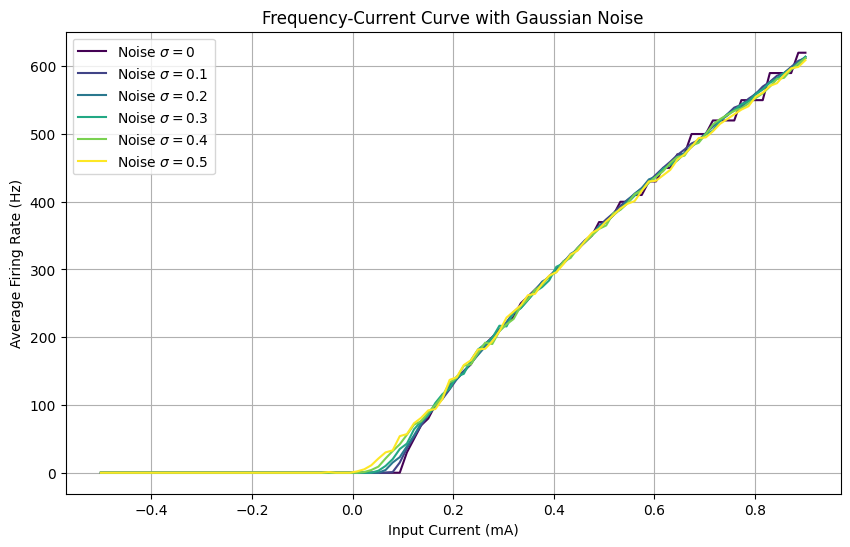

In [56]:

def lif_fi_curve(
    I_range: np.ndarray = np.linspace(-0.5, 0.9, 100),
    noise_levels: list[float] = [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    n_trials: int = 10,
    t_max: int = 100,
    **lif_kwargs,
):
    frequency = np.zeros_like(I_range)

    # Create a color map for different noise levels
    colors = cm.viridis(np.linspace(0, 1, len(noise_levels)))

    # Plotting setup
    plt.figure(figsize=(10, 6))

    for noise, color in zip(noise_levels, colors):
        print(f"Simulating noise level: {noise}")
        # Initialize frequency array for each noise level
        frequency_noise: np.ndarray = np.full_like(I_range, np.nan)

        for i, I in enumerate(I_range):
            spike_counts: np.ndarray = np.full(n_trials, np.nan)
            for trial in range(n_trials):
                spikes, V_trace, T_domain = lif_neuron(I=I, noise=noise, t_max=t_max, **lif_kwargs)
                spike_counts[trial] = len(spikes)

            # Calculate the average firing rate for this current and noise level
            avg_rate = np.mean(spike_counts) / (t_max / 1000)  # in Hz
            frequency_noise[i] = avg_rate

        # Plotting
        plt.plot(I_range, frequency_noise, label=f"Noise $\sigma={noise}$", color=color)

    plt.xlabel('Input Current (mA)')
    plt.ylabel('Average Firing Rate (Hz)')
    plt.title('Frequency-Current Curve with Gaussian Noise')
    # plt.colorbar(cm.ScalarMappable(cmap=cm.viridis), label='Noise Level')
    plt.legend()
    plt.grid(True)
    plt.show()

lif_fi_curve()